In [1]:
import time

from concrete.ml.sklearn import KNeighborsClassifier as ConcreteKNeighborsClassifier
import numpy as np
points_array = np.array([
    [2, 3], [1, 5], [3, 2], [5, 2], [1, 1],
    [9, 4], [13, 2], [14, 13], [9, 8], [8, 0],
    [2, 10], [3, 8], [8, 12], [4, 10], [7, 7],
])
N_PTS = points_array.shape[0]

n_neighbors = 3
concrete_knn = ConcreteKNeighborsClassifier(n_bits=6, n_neighbors=n_neighbors)
indexes = np.arange(N_PTS)
concrete_knn.fit(points_array.astype(float), indexes)


/home/riad/envs/zama/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KNeighborsClassifier(n_bits=6)

In [2]:
time_begin = time.time()
circuit = concrete_knn.compile(points_array)
print(f"Compilation time: {time.time() - time_begin:.2f} seconds")

Compilation time: 16.67 seconds


In [3]:
print(f"Maximum bit-width reached in the circuit: {circuit.graph.maximum_integer_bit_width()}")

Maximum bit-width reached in the circuit: 14


In [4]:
time_begin = time.time()
circuit.client.keygen()
print(f"Key generation time: {time.time() - time_begin:.2f} seconds")

Key generation time: 3.44 seconds


In [5]:
x, y = 4, 3

In [6]:
start_time = time.time()
decrypted_res = concrete_knn.get_topk_labels([(x,y)], fhe="execute")
print("FHE inference execution time:--- %s seconds ---" % (time.time() - start_time))

FHE inference execution time:--- 1203.0613384246826 seconds ---


In [7]:
# Gives the same execution time but inacurate results
# start_time = time.time()
# pos_enc = circuit.client.encrypt([[x, y]])
# result = circuit.server.run(pos_enc,  evaluation_keys=circuit.client.evaluation_keys)
# decrypted_res = circuit.client.decrypt(result)
# print("FHE inference execution time:--- %s seconds ---" % (time.time() - start_time))

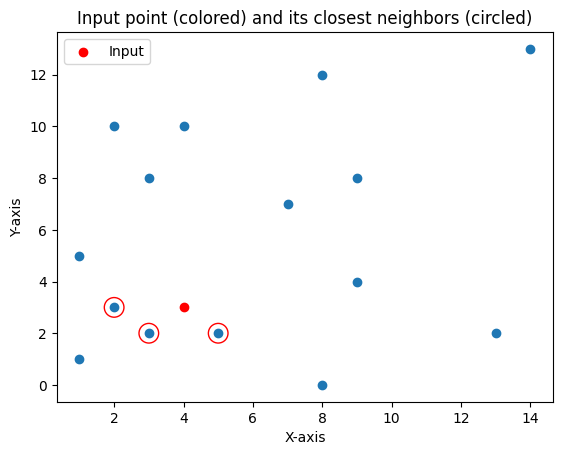

In [8]:
import matplotlib.pyplot as plt


xs = [point[0] for point in points_array]
ys = [point[1] for point in points_array]


plt.scatter(xs, ys)


plt.scatter(x, y, color='red', label='Input')

for point in decrypted_res[0]:
    plt.scatter(xs[point], ys[point], marker='o', facecolor='none', edgecolor='red', s=200)


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input point (colored) and its closest neighbors (circled)')
plt.legend()

plt.show()
